### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import statsmodels

from warnings import filterwarnings
filterwarnings("ignore")

# Problem:

## Part 1 - Sparkling Wine

## Problem Statement:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## 1. Read the data as an appropriate Time Series data and plot the data.

### Load the required Dataset

In [2]:
sparkling_wine = pd.read_csv('Sparkling.csv')
sparkling_wine.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


### Creating Time Stamps for Monthly Data

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
sparkling_wine['Time_Stamp'] = date
sparkling_wine.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [5]:
sparkling_wine.set_index(keys='Time_Stamp',drop=True,inplace=True)
sparkling_wine.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [6]:
sparkling_wine.drop(labels=['YearMonth'],axis=1,inplace=True)
sparkling_wine.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


### Plot the Time Series Data

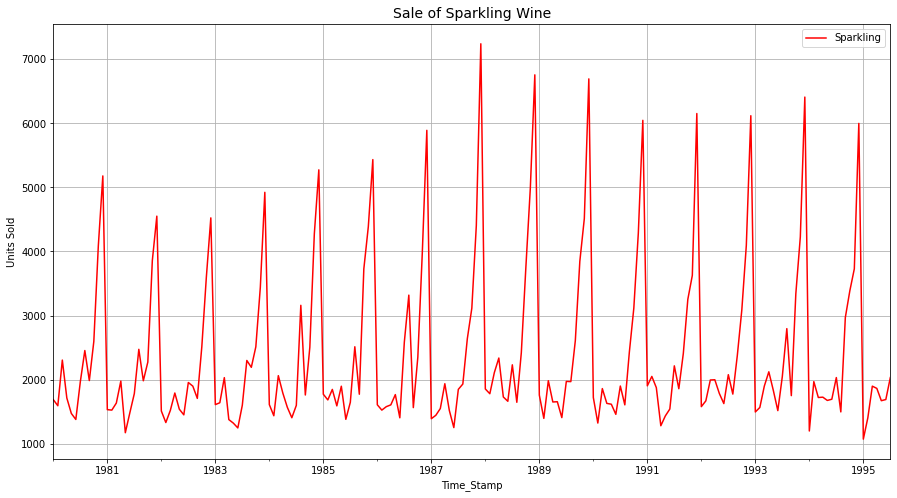

In [9]:
from pylab import rcParams
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "#e94cdc", "0.7"]) 
rcParams['figure.figsize'] = 15,8
sparkling_wine.plot()
plt.title('Sale of Sparkling Wine', fontsize=14)
plt.xlabel('Time_Stamp')
plt.ylabel('Units Sold')
plt.grid();

### Plot a month over year comparison of the sales

In [8]:
monthly_sales_across_years = pd.pivot_table(sparkling_wine, values = 'Sparkling', columns = sparkling_wine.index.month, index = sparkling_wine.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


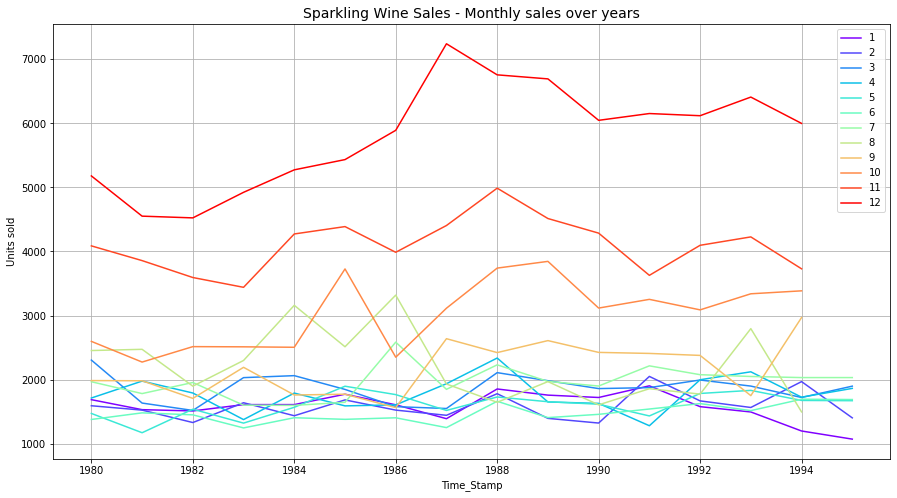

In [9]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Time_Stamp')
plt.title('Sparkling Wine Sales - Monthly sales over years', fontsize=14)
plt.grid();

### Plot a yearly comparison of the sales

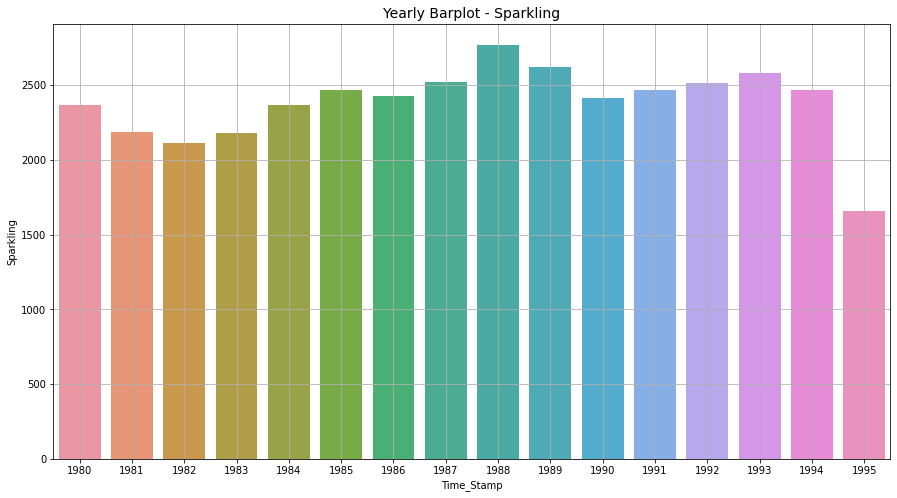

In [10]:
plt.figure(figsize = (15, 8))
sns.barplot(x = sparkling_wine.index.year, y = sparkling_wine['Sparkling'], ci = None)
plt.title('Yearly Barplot - Sparkling', fontsize = 14)
plt.grid();

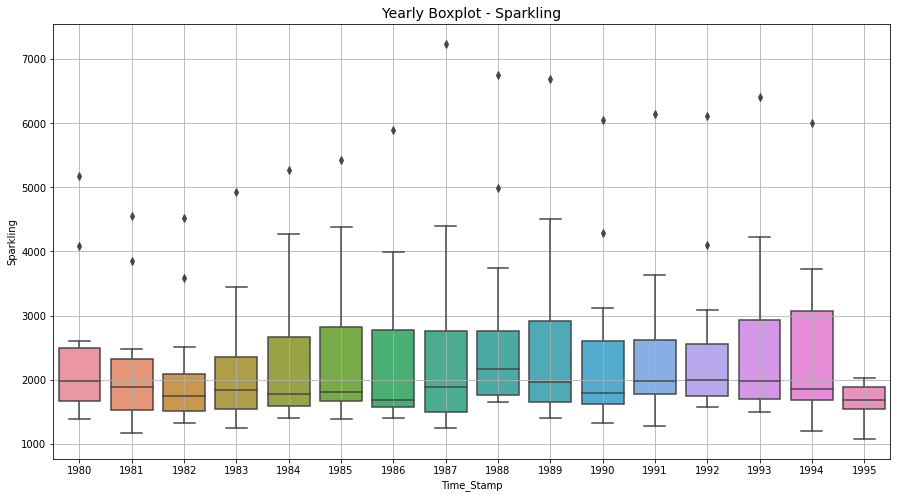

In [11]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = sparkling_wine.index.year, y = sparkling_wine['Sparkling'])
plt.title('Yearly Boxplot - Sparkling', fontsize = 14)
plt.grid();

### Plot a monthly comparison of the sales

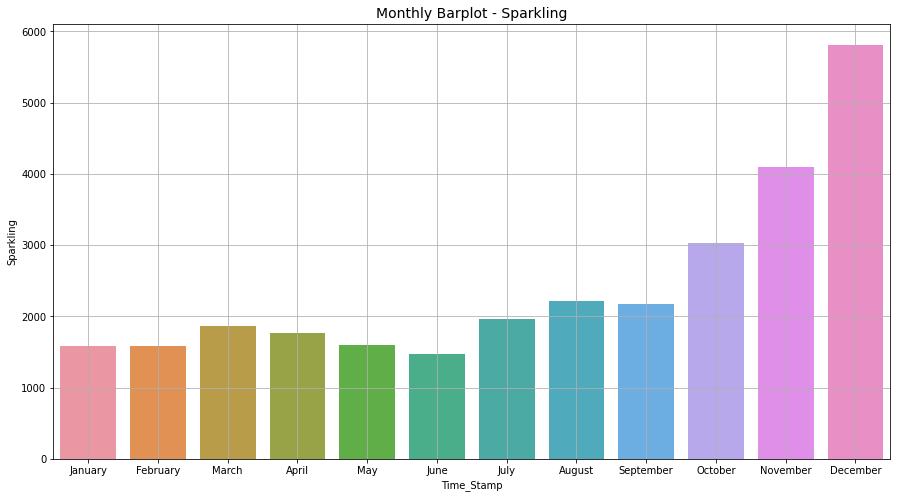

In [12]:
plt.figure(figsize = (15, 8))
sns.barplot(x = sparkling_wine.index.month_name(), y = sparkling_wine['Sparkling'], ci = None)
plt.title('Monthly Barplot - Sparkling', fontsize = 14)
plt.grid();

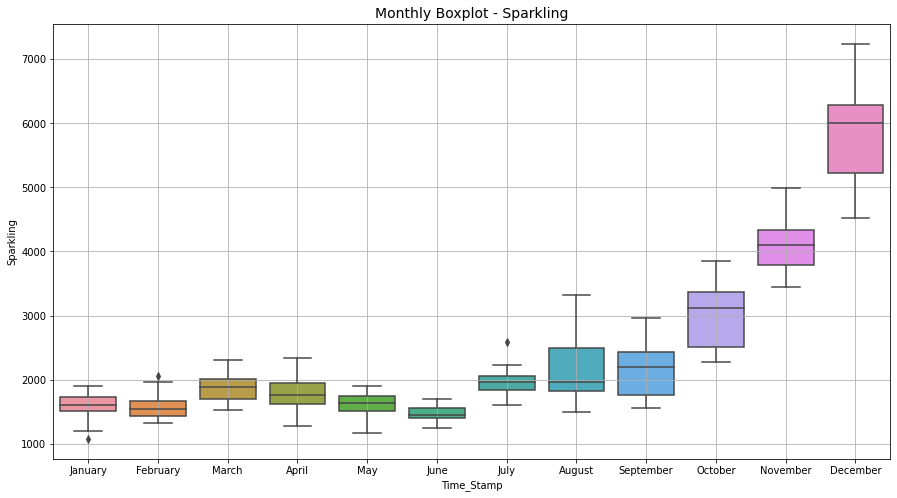

In [13]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = sparkling_wine.index.month_name(), y = sparkling_wine['Sparkling'])
plt.title('Monthly Boxplot - Sparkling', fontsize = 14)
plt.grid();

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Explanatory Data Analysis

### Dataset 

In [14]:
sparkling_wine.shape
print("The number of rows are:", sparkling_wine.shape[0],"and the number of columns are:", sparkling_wine.shape[1])

The number of rows are: 187 and the number of columns are: 1


In [15]:
sparkling_wine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


The dataset consists of Sparkling wine sales which are continuous in nature.

### Check for Missing Values

In [16]:
sparkling_wine.isnull().sum()

Sparkling    0
dtype: int64

We can conclude, that by observing the results above there is no evidence of missing values present in our dataset.

### Check for Duplicate Rows

In [17]:
dups = sparkling_wine.duplicated()
dups.sum()

11

We can conclude, that by observing the results above there are 11 duplicated rows present in our dataset that need not be eliminated as they can be repetitive throughout the series.

### Descriptive Statistics

In [18]:
sparkling_wine.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Decompose the data and check the trend, seasonality and the irregular/residual/error component.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition

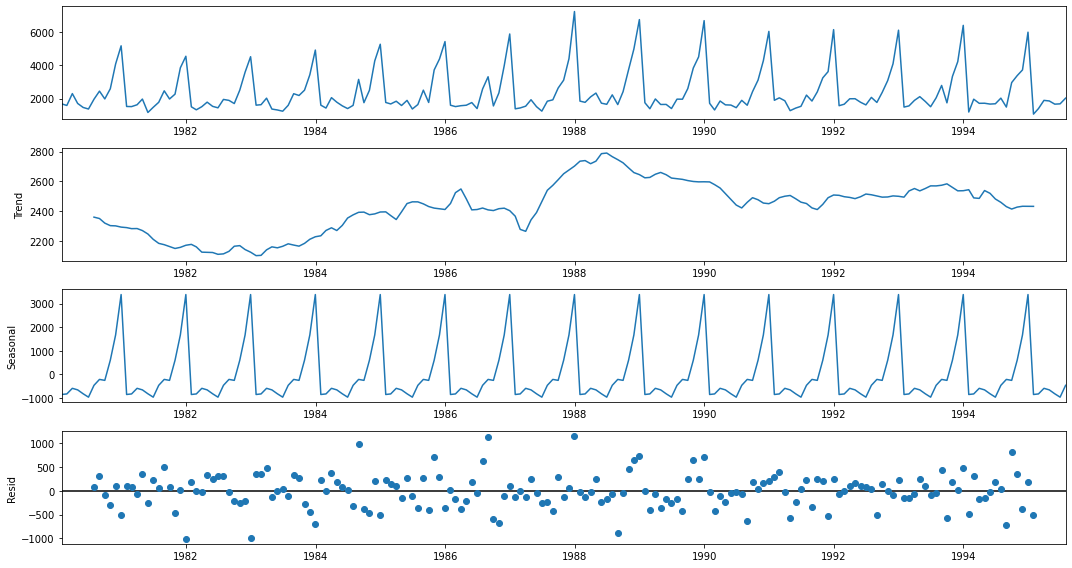

In [20]:
decomposition = seasonal_decompose(sparkling_wine,model='additive')
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [22]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
                 ...    
1995-03-31   -592.356630
1995-04-30   -658.490559
1995-05-31   -824.416154
1995-06-30   -967.434011
1995-07-31   -465.502265
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



### Multiplicative Decomposition

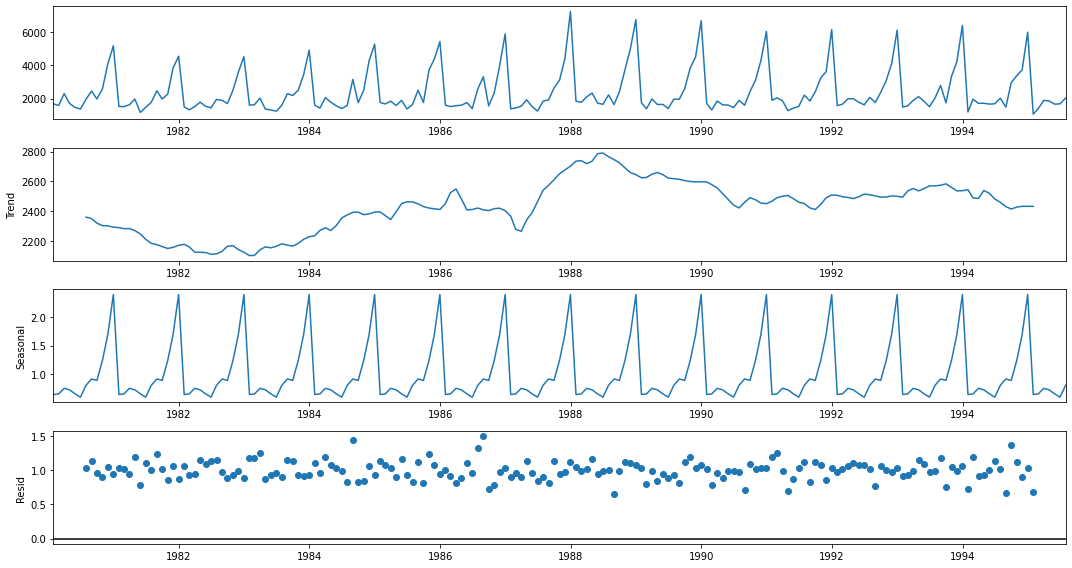

In [23]:
decomposition = seasonal_decompose(sparkling_wine,model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [25]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
                ...   
1995-03-31    0.757440
1995-04-30    0.730351
1995-05-31    0.660609
1995-06-30    0.603468
1995-07-31    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



## 3. Split the data into training and test. The test data should start in 1991.

In [26]:
train = sparkling_wine[sparkling_wine.index.year < 1991]
test = sparkling_wine[sparkling_wine.index.year >= 1991]

In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [28]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



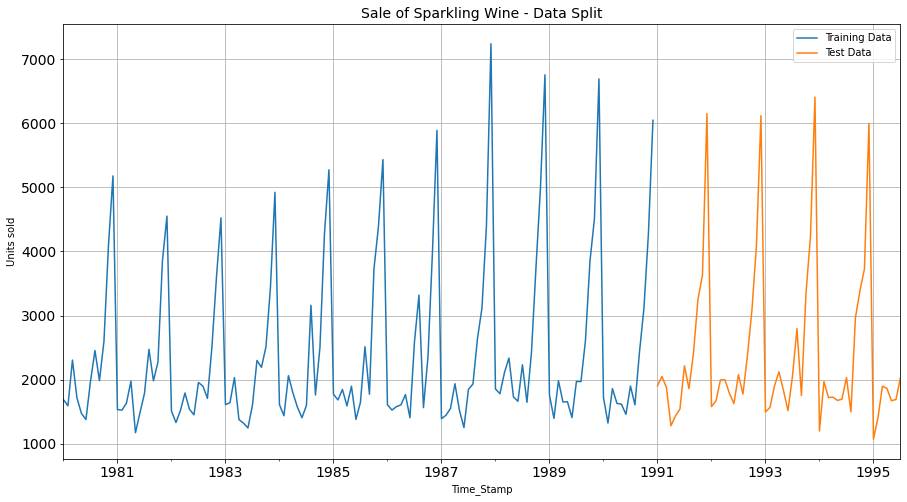

In [29]:
train['Sparkling'].plot(figsize=(15,8), fontsize=14)
test['Sparkling'].plot(figsize=(15,8), fontsize=14)
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sale of Sparkling Wine - Data Split', fontsize=14)
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.



## 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### Model 1: Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [35]:
LinearRegression_train['RegOnTime'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime'] = lr.predict(LinearRegression_test[['time']])

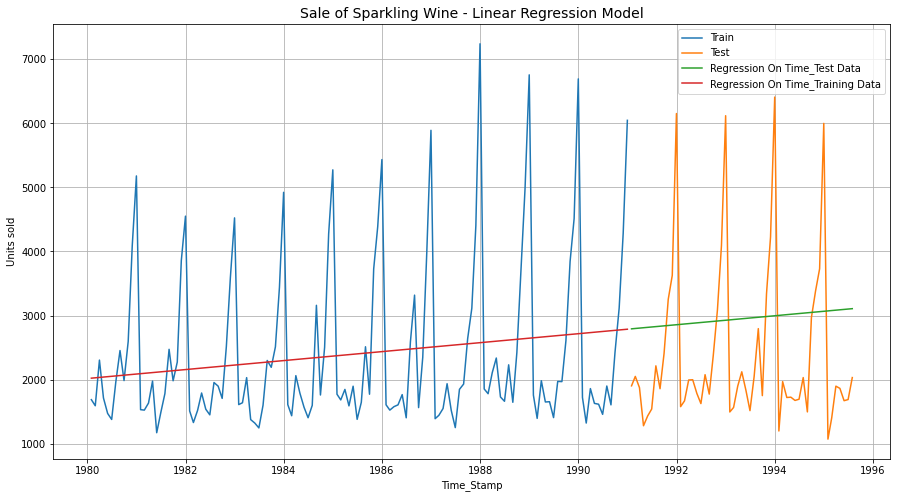

In [36]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Linear Regression Model', fontsize = 14);

### Model Evaluation

In [37]:
from sklearn import metrics

In [38]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [39]:
rmse_sparkling_wine_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime'],squared=False)
mape_sparkling_wine_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model1_train, mape_sparkling_wine_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [40]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model1_train],'Train MAPE': [mape_sparkling_wine_model1_train]},index=['RegressionOnTime'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
RegressionOnTime,1279.322346,40.05


#### Test Data

In [41]:
rmse_sparkling_wine_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime'],squared=False)
mape_sparkling_wine_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model1_test, mape_sparkling_wine_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [42]:
sparkling_wine_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model1_test],'Test MAPE': [mape_sparkling_wine_model1_test]},index=['RegressionOnTime'])
sparkling_wine_resultsDf1

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


In [43]:
spark_resultsDf = sparkling_wine_resultsDf1
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


### Model 2: Naïve forecast

In [44]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

#### Train Data

In [45]:
NaiveModel_train['sparkling_wine_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['sparkling_wine_naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: sparkling_wine_naive, dtype: int64

#### Test Data

In [46]:
NaiveModel_test['sparkling_wine_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['sparkling_wine_naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: sparkling_wine_naive, dtype: int64

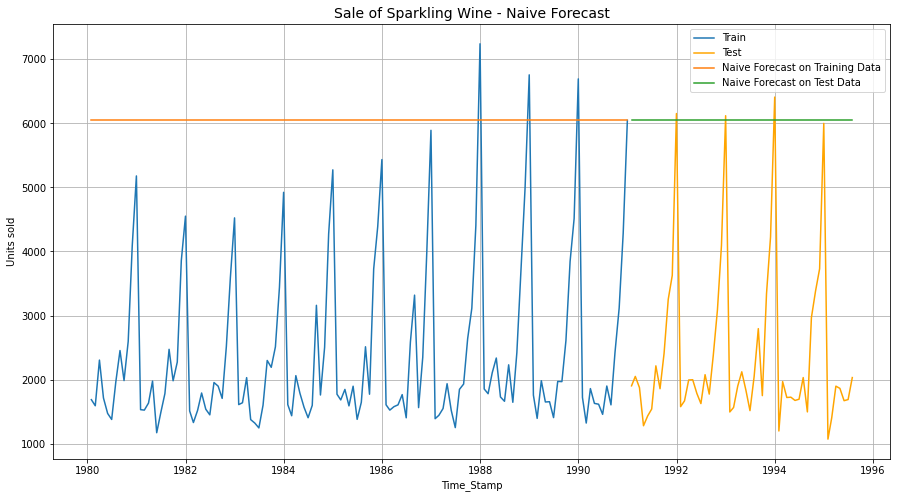

In [47]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['sparkling_wine_naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['sparkling_wine_naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Naive Forecast', fontsize = 14);

### Model Evaluation

In [48]:
from sklearn import metrics

In [49]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [50]:
rmse_sparkling_wine_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['sparkling_wine_naive'],squared=False)
mape_sparkling_wine_model2_train = MAPE(train['Sparkling'],NaiveModel_train['sparkling_wine_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model2_train, mape_sparkling_wine_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [51]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model2_train],'Train MAPE': [mape_sparkling_wine_model2_train]},index=['NaiveModel'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
NaiveModel,3867.700802,153.17


#### Test Data

In [52]:
rmse_sparkling_wine_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['sparkling_wine_naive'],squared=False)
mape_sparkling_wine_model2_test = MAPE(test['Sparkling'],NaiveModel_test['sparkling_wine_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model2_test, mape_sparkling_wine_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [53]:
sparkling_wine_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model2_test],'Test MAPE': [mape_sparkling_wine_model2_test]},index=['NaiveModel'])
sparkling_wine_resultsDf2

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87


In [54]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf2])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87


### Model 3: Simple Average

In [55]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

#### Train Data

In [56]:
SimpleAverage_train['sparkling_wine_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['sparkling_wine_mean_forecast'].head()

Time_Stamp
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: sparkling_wine_mean_forecast, dtype: float64

#### Test Data

In [57]:
SimpleAverage_test['sparkling_wine_mean_forecast'] = test['Sparkling'].mean()
SimpleAverage_test['sparkling_wine_mean_forecast'].head()

Time_Stamp
1991-01-31    2399.145455
1991-02-28    2399.145455
1991-03-31    2399.145455
1991-04-30    2399.145455
1991-05-31    2399.145455
Name: sparkling_wine_mean_forecast, dtype: float64

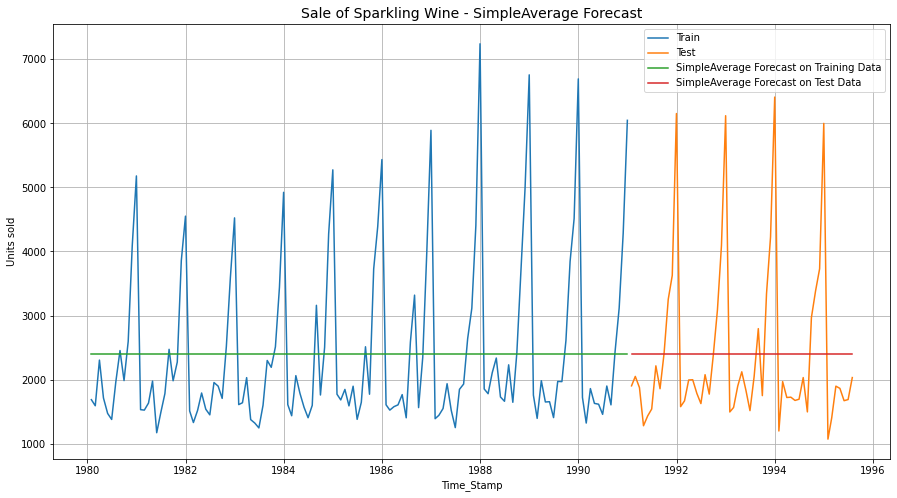

In [58]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['sparkling_wine_mean_forecast'], label='SimpleAverage Forecast on Training Data')
plt.plot(SimpleAverage_test['sparkling_wine_mean_forecast'], label='SimpleAverage Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - SimpleAverage Forecast', fontsize = 14);

### Model Evaluation

In [59]:
from sklearn import metrics

In [60]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [61]:
rmse_sparkling_wine_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['sparkling_wine_mean_forecast'],squared=False)
mape_sparkling_wine_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['sparkling_wine_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model3_train, mape_sparkling_wine_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [62]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model3_train],'Train MAPE': [mape_sparkling_wine_model3_train]},index=['SimpleAverage'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
SimpleAverage,1298.483628,40.36


#### Test Data

In [63]:
rmse_sparkling_wine_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['sparkling_wine_mean_forecast'],squared=False)
mape_sparkling_wine_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['sparkling_wine_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model3_test, mape_sparkling_wine_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.073 and MAPE is 38.81


In [64]:
sparkling_wine_resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model3_test],'Test MAPE': [mape_sparkling_wine_model3_test]},index=['SimpleAverage'])
sparkling_wine_resultsDf3

,Test RMSE,Test MAPE
SimpleAverage,1275.07338,38.81


In [65]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf3])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.073380,38.81


### Model 4: Moving Average

In [66]:
MovingAverage = sparkling_wine.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [67]:
MovingAverage['Sparkling_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Sparkling_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Sparkling_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Sparkling_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Sparkling_Trailing_2,Sparkling_Trailing_4,Sparkling_Trailing_6,Sparkling_Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


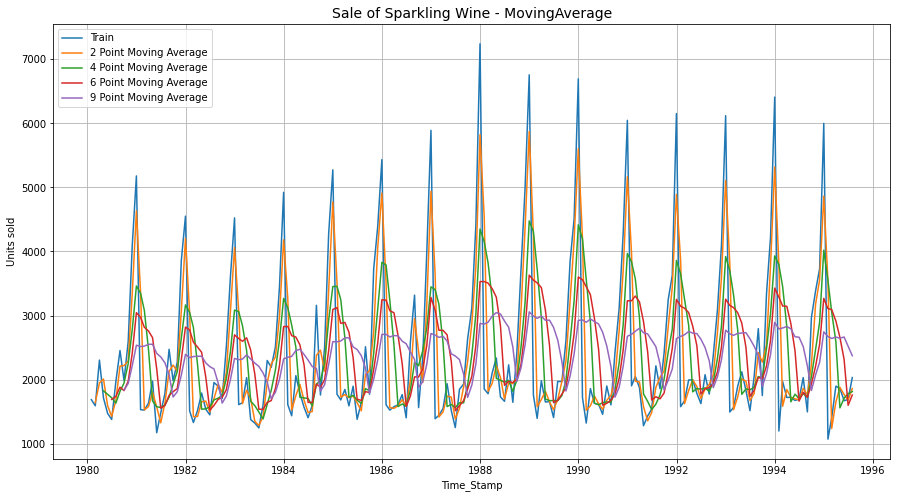

In [68]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Sparkling_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - MovingAverage', fontsize = 14);

### Split the data into training and test

In [69]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

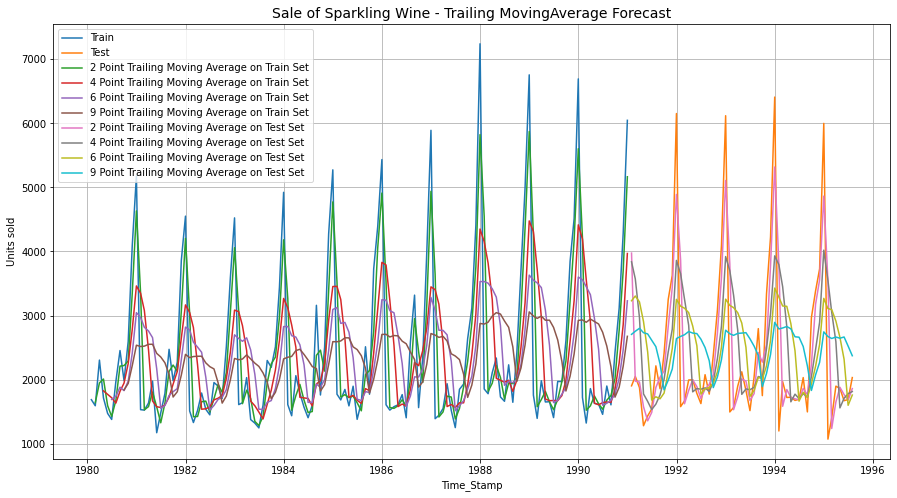

In [70]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Sparkling_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Sparkling_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Sparkling_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Sparkling_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Trailing MovingAverage Forecast', fontsize = 14);

### Model Evaluation

In [71]:
from sklearn import metrics

In [72]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Test Data

In [73]:
## RSME & MAPE --> 2 point Sparkling_Trailing MA

rmse_sparkling_wine_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_2'],squared=False)
mape_sparkling_wine_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model4_test_2, mape_sparkling_wine_model4_test_2))

## RSME & MAPE --> 4 point Sparkling_Trailing MA

rmse_sparkling_wine_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_4'],squared=False)
mape_sparkling_wine_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model4_test_4, mape_sparkling_wine_model4_test_4))

## RSME & MAPE --> 6 point Sparkling_Trailing MA

rmse_sparkling_wine_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_6'],squared=False)
mape_sparkling_wine_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model4_test_6, mape_sparkling_wine_model4_test_6))

## RSME & MAPE --> 9 point Sparkling_Trailing MA

rmse_sparkling_wine_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_9'],squared=False)
mape_sparkling_wine_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model4_test_9, mape_sparkling_wine_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401 and MAPE is 19.70
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590 and MAPE is 35.96
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 and MAPE is 46.86


In [74]:
sparkling_wine_resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model4_test_2,
                                                       rmse_sparkling_wine_model4_test_4,
                                                       rmse_sparkling_wine_model4_test_6,
                                                       rmse_sparkling_wine_model4_test_9]
                            ,'Test MAPE': [mape_sparkling_wine_model4_test_2,
                                           mape_sparkling_wine_model4_test_4,
                                           mape_sparkling_wine_model4_test_6,
                                           mape_sparkling_wine_model4_test_9]}
                           ,index = ['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])
sparkling_wine_resultsDf4

,Test RMSE,Test MAPE
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86


In [75]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf4])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.073380,38.81
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86


### Model 5: Simple Exponential Smoothing

In [76]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [77]:
SES_train = train.copy()
SES_test = test.copy()

In [78]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [79]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [80]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
train_predictions_SES = model_SES_autofit.forecast(steps=len(train))
train_predictions_SES

1991-01-31    2725.336037
1991-02-28    2725.336037
1991-03-31    2725.336037
1991-04-30    2725.336037
1991-05-31    2725.336037
                 ...     
2001-08-31    2725.336037
2001-09-30    2725.336037
2001-10-31    2725.336037
2001-11-30    2725.336037
2001-12-31    2725.336037
Freq: M, Length: 132, dtype: float64

In [82]:
test_predictions_SES = model_SES_autofit.forecast(steps=len(test))
test_predictions_SES

1991-01-31    2725.336037
1991-02-28    2725.336037
1991-03-31    2725.336037
1991-04-30    2725.336037
1991-05-31    2725.336037
1991-06-30    2725.336037
1991-07-31    2725.336037
1991-08-31    2725.336037
1991-09-30    2725.336037
1991-10-31    2725.336037
1991-11-30    2725.336037
1991-12-31    2725.336037
1992-01-31    2725.336037
1992-02-29    2725.336037
1992-03-31    2725.336037
1992-04-30    2725.336037
1992-05-31    2725.336037
1992-06-30    2725.336037
1992-07-31    2725.336037
1992-08-31    2725.336037
1992-09-30    2725.336037
1992-10-31    2725.336037
1992-11-30    2725.336037
1992-12-31    2725.336037
1993-01-31    2725.336037
1993-02-28    2725.336037
1993-03-31    2725.336037
1993-04-30    2725.336037
1993-05-31    2725.336037
1993-06-30    2725.336037
1993-07-31    2725.336037
1993-08-31    2725.336037
1993-09-30    2725.336037
1993-10-31    2725.336037
1993-11-30    2725.336037
1993-12-31    2725.336037
1994-01-31    2725.336037
1994-02-28    2725.336037
1994-03-31  

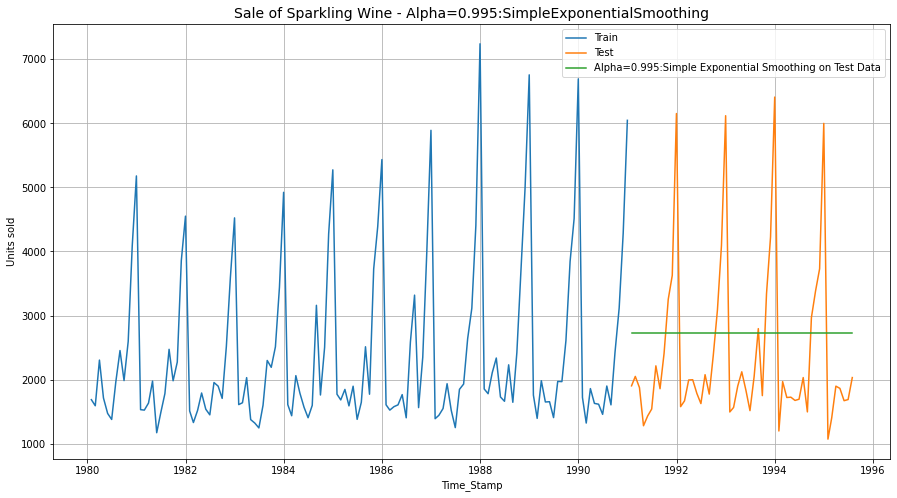

In [83]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_predictions_SES, label='Alpha=0.995:Simple Exponential Smoothing on Test Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Alpha=0.995:SimpleExponentialSmoothing', fontsize = 14);

### Model Evaluation

In [84]:
from sklearn import metrics

In [85]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [86]:
rmse_sparkling_wine_model5_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_SES,squared=False)
mape_sparkling_wine_model5_train = MAPE(train['Sparkling'],train_predictions_SES)
print("For Simple Exponential Smoothing forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model5_train, mape_sparkling_wine_model5_train))

For Simple Exponential Smoothing forecast on the Training Data,  RMSE is 1337.706 and MAPE is 46.98


In [87]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model5_train],'Train MAPE': [mape_sparkling_wine_model5_train]},index=['Alpha=0.995:SimpleExponentialSmoothing'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
Alpha=0.995:SimpleExponentialSmoothing,1337.706179,46.98


### Test Data

In [88]:
rmse_sparkling_wine_model5_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_SES,squared=False)
mape_sparkling_wine_model5_test = MAPE(test['Sparkling'],test_predictions_SES)
print("For Simple Exponential Smoothing forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model5_test, mape_sparkling_wine_model5_test))

For Simple Exponential Smoothing forecast on the Testing Data,  RMSE is 1316.135 and MAPE is 45.47


In [89]:
sparkling_wine_resultsDf5 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model5_test],'Test MAPE': [mape_sparkling_wine_model5_test]},index=['Alpha=0.995:SimpleExponentialSmoothing'])
sparkling_wine_resultsDf5

,Test RMSE,Test MAPE
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.47


In [90]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf5])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.073380,38.81
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.47


### Model 6: Double Exponential Smoothing (Holt)

In [91]:
from statsmodels.tsa.api import Holt

In [92]:
DES_train = train.copy()
DES_test = test.copy()

In [93]:
model_DES = Holt(SES_train['Sparkling'])

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [94]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [95]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.688571,True
smoothing_trend,beta,0.000100,True
initial_level,l.0,1686.000000,True
initial_trend,b.0,-95.000000,True


In [96]:
train_predictions_DES = model_DES_autofit.forecast(steps=len(train))
train_predictions_DES

1991-01-31    5221.278699
1991-02-28    5127.886554
1991-03-31    5034.494409
1991-04-30    4941.102264
1991-05-31    4847.710119
                 ...     
2001-08-31   -6639.523719
2001-09-30   -6732.915864
2001-10-31   -6826.308009
2001-11-30   -6919.700154
2001-12-31   -7013.092299
Freq: M, Length: 132, dtype: float64

In [97]:
test_predictions_DES = model_DES_autofit.forecast(steps=len(test))
test_predictions_DES

1991-01-31    5221.278699
1991-02-28    5127.886554
1991-03-31    5034.494409
1991-04-30    4941.102264
1991-05-31    4847.710119
1991-06-30    4754.317974
1991-07-31    4660.925829
1991-08-31    4567.533684
1991-09-30    4474.141539
1991-10-31    4380.749394
1991-11-30    4287.357249
1991-12-31    4193.965104
1992-01-31    4100.572959
1992-02-29    4007.180813
1992-03-31    3913.788668
1992-04-30    3820.396523
1992-05-31    3727.004378
1992-06-30    3633.612233
1992-07-31    3540.220088
1992-08-31    3446.827943
1992-09-30    3353.435798
1992-10-31    3260.043653
1992-11-30    3166.651508
1992-12-31    3073.259363
1993-01-31    2979.867218
1993-02-28    2886.475073
1993-03-31    2793.082928
1993-04-30    2699.690783
1993-05-31    2606.298638
1993-06-30    2512.906493
1993-07-31    2419.514348
1993-08-31    2326.122203
1993-09-30    2232.730058
1993-10-31    2139.337913
1993-11-30    2045.945768
1993-12-31    1952.553623
1994-01-31    1859.161478
1994-02-28    1765.769333
1994-03-31  

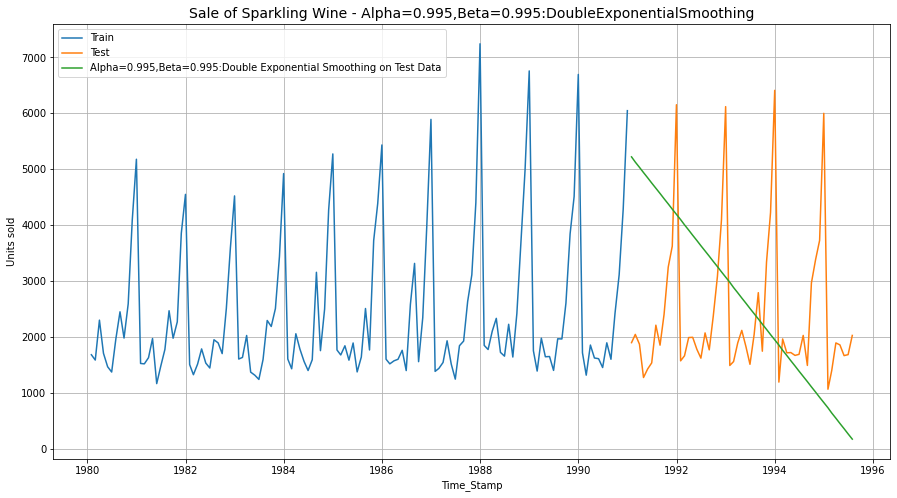

In [98]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_predictions_DES, label='Alpha=0.995,Beta=0.995:Double Exponential Smoothing on Test Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing', fontsize = 14);

### Model Evaluation

In [99]:
from sklearn import metrics

In [100]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [101]:
rmse_sparkling_wine_model6_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_DES,squared=False)
mape_sparkling_wine_model6_train = MAPE(train['Sparkling'],train_predictions_DES)
print("For Double Exponential Smoothing forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model6_train, mape_sparkling_wine_model6_train))

For Double Exponential Smoothing forecast on the Training Data,  RMSE is 5178.758 and MAPE is 173.65


In [102]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model6_train],'Train MAPE': [mape_sparkling_wine_model6_train]},index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",5178.758121,173.65


#### Test Data

In [103]:
rmse_sparkling_wine_model6_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_DES,squared=False)
mape_sparkling_wine_model6_test = MAPE(test['Sparkling'],test_predictions_DES)
print("For Double Exponential Smoothing forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model6_test, mape_sparkling_wine_model6_test))

For Double Exponential Smoothing forecast on the Testing Data,  RMSE is 2007.239 and MAPE is 68.23


In [104]:
sparkling_wine_resultsDf6 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model6_test],'Test MAPE': [mape_sparkling_wine_model6_test]},index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])
sparkling_wine_resultsDf6

,Test RMSE,Test MAPE
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.23


In [105]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf6])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.073380,38.81
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.47
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.23


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [106]:
from statsmodels.tsa.api import ExponentialSmoothing

In [107]:
TES_train = train.copy()
TES_test = test.copy()

In [108]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [109]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [110]:
model_TES_autofit.params

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
train_predictions_TES = model_TES_autofit.forecast(steps=len(train))
train_predictions_TES

1991-01-31    1577.208163
1991-02-28    1333.663154
1991-03-31    1745.977341
1991-04-30    1630.435405
1991-05-31    1523.306429
                 ...     
2001-08-31     987.630940
2001-09-30    1264.306419
2001-10-31    1723.017188
2001-11-30    2265.244781
2001-12-31    3226.030390
Freq: M, Length: 132, dtype: float64

In [112]:
test_predictions_TES = model_TES_autofit.forecast(steps=len(test))
test_predictions_TES

1991-01-31    1577.208163
1991-02-28    1333.663154
1991-03-31    1745.977341
1991-04-30    1630.435405
1991-05-31    1523.306429
1991-06-30    1339.503840
1991-07-31    1826.890422
1991-08-31    1760.667746
1991-09-30    2260.399353
1991-10-31    3089.480192
1991-11-30    4073.680714
1991-12-31    5818.749010
1992-01-31    1509.688730
1992-02-29    1276.365344
1992-03-31    1670.695864
1992-04-30    1559.882257
1992-05-31    1457.150467
1992-06-30    1281.118975
1992-07-31    1746.971585
1992-08-31    1683.364065
1992-09-30    2160.790060
1992-10-31    2952.833891
1992-11-30    3892.837120
1992-12-31    5559.477148
1993-01-31    1442.169298
1993-02-28    1219.067535
1993-03-31    1595.414387
1993-04-30    1489.329109
1993-05-31    1390.994505
1993-06-30    1222.734109
1993-07-31    1667.052748
1993-08-31    1606.060385
1993-09-30    2061.180766
1993-10-31    2816.187591
1993-11-30    3711.993527
1993-12-31    5300.205286
1994-01-31    1374.649865
1994-02-28    1161.769726
1994-03-31  

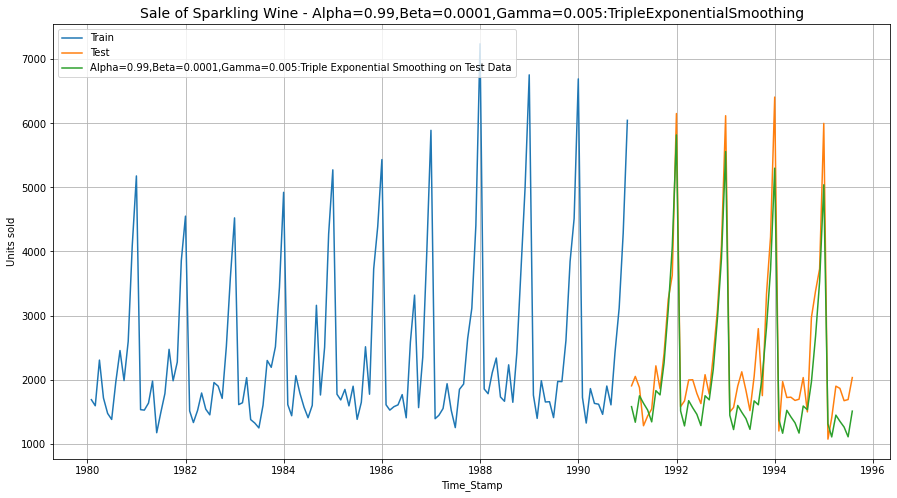

In [113]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_predictions_TES, label='Alpha=0.99,Beta=0.0001,Gamma=0.005:Triple Exponential Smoothing on Test Data')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sale of Sparkling Wine - Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing', fontsize = 14);

### Model Evaluation

In [114]:
from sklearn import metrics

In [115]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#### Train Data

In [116]:
rmse_sparkling_wine_model7_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_TES,squared=False)
mape_sparkling_wine_model7_train = MAPE(train['Sparkling'],train_predictions_TES)
print("For Triple Exponential Smoothing forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model7_train, mape_sparkling_wine_model7_train))

For Triple Exponential Smoothing forecast on the Training Data,  RMSE is 937.914 and MAPE is 28.08


In [117]:
sparkling_wine_resultsDf = pd.DataFrame({'Train RMSE': [rmse_sparkling_wine_model7_train],'Train MAPE': [mape_sparkling_wine_model7_train]},index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing'])
sparkling_wine_resultsDf

,Train RMSE,Train MAPE
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",937.914393,28.08


#### Test Data

In [118]:
rmse_sparkling_wine_model7_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_TES,squared=False)
mape_sparkling_wine_model7_test = MAPE(test['Sparkling'],test_predictions_TES)
print("For Triple Exponential Smoothing forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model7_test, mape_sparkling_wine_model7_test))

For Triple Exponential Smoothing forecast on the Testing Data,  RMSE is 469.659 and MAPE is 16.39


In [119]:
sparkling_wine_resultsDf7 = pd.DataFrame({'Test RMSE': [rmse_sparkling_wine_model7_test],'Test MAPE': [mape_sparkling_wine_model7_test]},index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing'])
sparkling_wine_resultsDf7

,Test RMSE,Test MAPE
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.39


In [120]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf7])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.073380,38.81
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.47
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.23
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.39


### Model Comparison Plots

Text(0.5, 1.0, 'Sale of Sparkling Wine: Forecast Vs Actual Test set')

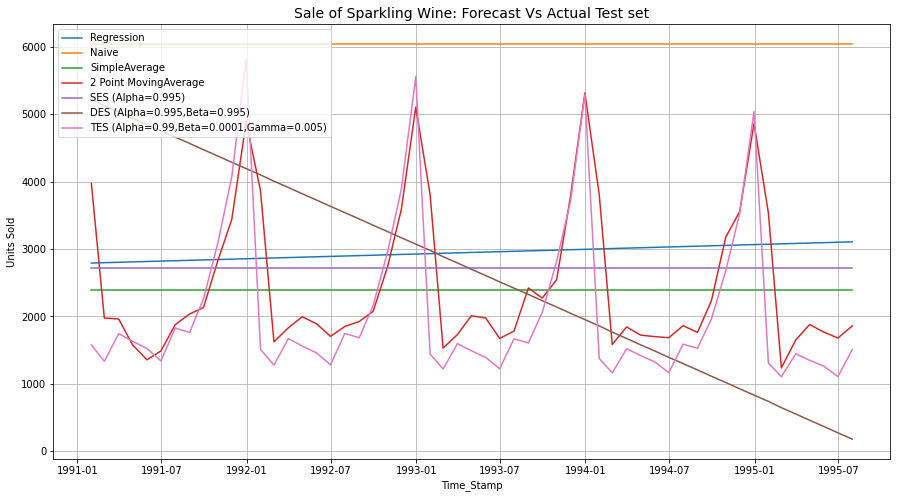

In [121]:
plt.plot(LinearRegression_test['RegOnTime'], label='Regression')
plt.plot(NaiveModel_test['sparkling_wine_naive'], label='Naive')
plt.plot(SimpleAverage_test['sparkling_wine_mean_forecast'], label='SimpleAverage')
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'],  label='2 Point MovingAverage')
plt.plot(test_predictions_SES, label='SES (Alpha=0.995)')
plt.plot(test_predictions_DES, label='DES (Alpha=0.995,Beta=0.995)')
plt.plot(test_predictions_TES, label='TES (Alpha=0.99,Beta=0.0001,Gamma=0.005)')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time_Stamp')
plt.ylabel('Units Sold')
plt.title('Sale of Sparkling Wine: Forecast Vs Actual Test set', fontsize=14)

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

### Note: Stationarity should be checked at alpha = 0.05.

Where Alpha = 0.05

    If p-value < 0.05, then we Reject the Null-Hypothesis (Accept the Alternative Hypothesis - Statistically Significant)
    
    If p-value > 0.05, then we fail to Reject the Null-Hypothesis (Accept the Null Hypothesis - Statistically Insignificant)

### The Null & Alternative Hypothesis for the give statistical test are:
#### Null Hypothesis  $H_0$:  Time Series is non-stationary.
#### Alternative Hypothesis $H_A$: Time Series is stationary.

In [122]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

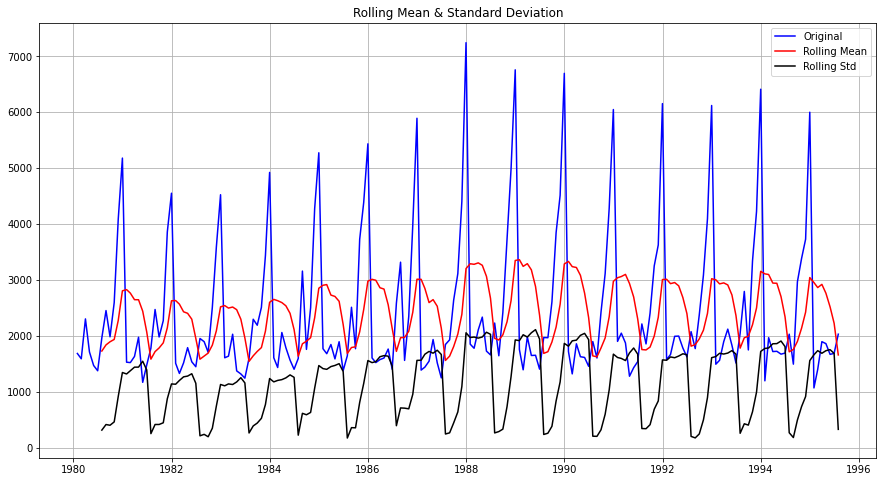

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [123]:
plt.figure(figsize=(15,8))
plt.grid()
test_stationarity(sparkling_wine['Sparkling'])

Since p-value > 0.05 the Time Series is non-stationary. Thus we difference the Time series to make it stationary.

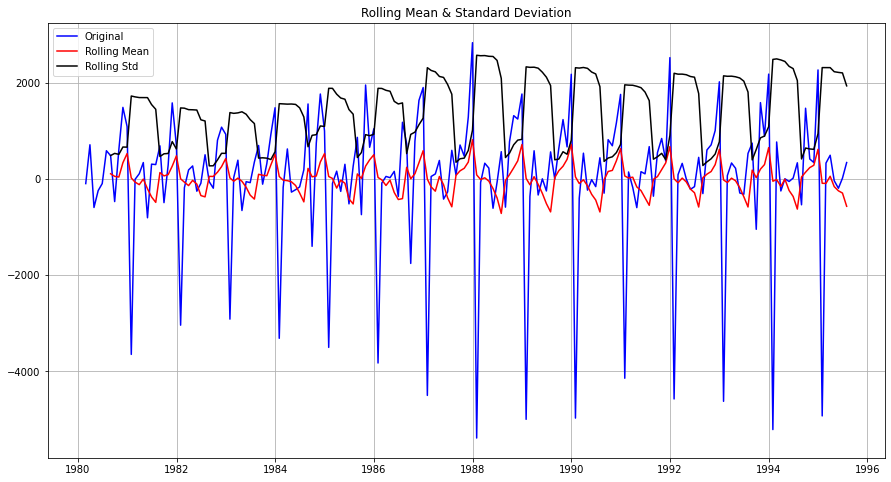

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [124]:
plt.figure(figsize=(15,8))
plt.grid()
test_stationarity(sparkling_wine['Sparkling'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary. 

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model

In [125]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [126]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [127]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592133
ARIMA(0, 1, 2) - AIC:2234.4083231291497
ARIMA(0, 1, 3) - AIC:2233.9948577420064
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.5272004521435
ARIMA(1, 1, 3) - AIC:2235.6078163476477
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626308103
ARIMA(2, 1, 2) - AIC:2213.5092123973454


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9305188226363
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4988428729475


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.7666102201465
ARIMA(3, 1, 3) - AIC:2221.461700336058


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.461700
14,"(3, 1, 2)",2230.766610
11,"(2, 1, 3)",2232.930519
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.498843
7,"(1, 1, 3)",2235.607816


Lowest AIC is 2213.509 with params (2,1,2)

In [129]:
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_ARIMA = mod.fit()

print(results_ARIMA.summary())

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 19 Feb 2022   AIC                           2213.509
Time:                        00:13:08   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

The above model is an AutoRegressive Integrated Moving Average model of order (2,1,2) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 2 and a lag and a degree or order differencing of 1 to make it stationary.

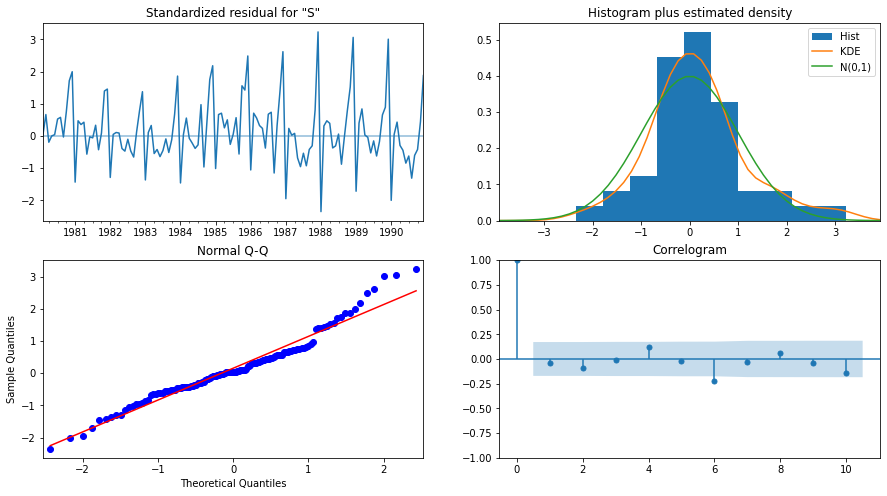

In [130]:
results_ARIMA.plot_diagnostics();

### Model Evaluation

In [131]:
predicted_auto_ARIMA = results_ARIMA.forecast(steps=len(test))

In [132]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

from sklearn.metrics import mean_squared_error

In [133]:
RMSE_ARIMA = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
MAPE_ARIMA = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE for the ARIMA model:',RMSE_ARIMA,'\nMAPE for the ARIMA model:',MAPE_ARIMA)

RMSE for the ARIMA model: 1299.980352534368 
MAPE for the ARIMA model: 47.10012208543014


In [134]:
sparkling_wine_resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [RMSE_ARIMA],'Test MAPE': [MAPE_ARIMA]},index=['ARIMA(2, 1, 2)'])
sparkling_wine_resultsDf_ARIMA

,Test RMSE,Test MAPE
"ARIMA(2, 1, 2)",1299.980353,47.100122


In [135]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf_ARIMA])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.150000
NaiveModel,3864.279352,152.870000
SimpleAverage,1275.073380,38.810000
2 point TMA,813.400684,19.700000
4 point TMA,1156.589694,35.960000
6 point TMA,1283.927428,43.860000
9 point TMA,1346.278315,46.860000
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.470000
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.230000
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.390000


### SARIMA Model

In [136]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [137]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [138]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640236032
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389776
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791726
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158604901
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.989805392084
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566435
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572999903
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881837643
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319380044
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509144560762
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954179886
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245084042036
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018823976

In [139]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934564
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121565
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


Lowest AIC is 1555.584 with params (1,1,2) and seasonal (1,0,2,12)

In [140]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.793
Date:                            Sat, 19 Feb 2022   AIC                           1555.586
Time:                                    00:15:02   BIC                           1574.097
Sample:                                01-31-1980   HQIC                          1563.085
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6288      0.252     -2.494      0.013      -1.123      -0.135
ma.L1         -0.1027      0.222   

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


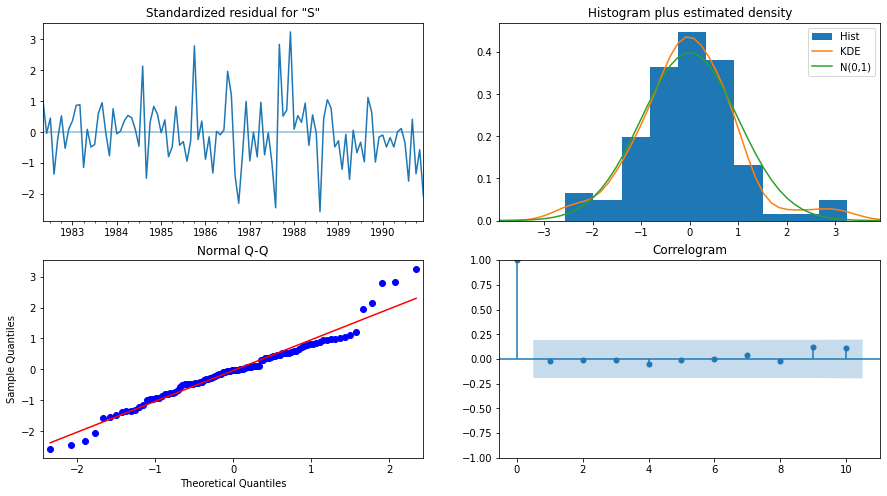

In [141]:
results_SARIMA.plot_diagnostics();

### Model Evaluation

In [142]:
predicted_auto_SARIMA = results_SARIMA.forecast(steps=len(test))

In [143]:
RMSE_SARIMA = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA,squared=False)
MAPE_SARIMA = MAPE(test['Sparkling'],predicted_auto_SARIMA)

print('RMSE for the SARIMA model:',RMSE_SARIMA,'\nMAPE for the SARIMA model:',MAPE_SARIMA)

RMSE for the SARIMA model: 526.2589525120587 
MAPE for the SARIMA model: 18.79


In [144]:
sparkling_wine_resultsDf_SARIMA = pd.DataFrame({'Test RMSE': [RMSE_SARIMA],'Test MAPE': [MAPE_SARIMA]},index=['SARIMAX(1, 1, 2)x(1, 0, 2, 12)'])
sparkling_wine_resultsDf_SARIMA

,Test RMSE,Test MAPE
"SARIMAX(1, 1, 2)x(1, 0, 2, 12)",526.258953,18.79


In [145]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf_SARIMA])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.150000
NaiveModel,3864.279352,152.870000
SimpleAverage,1275.073380,38.810000
2 point TMA,813.400684,19.700000
4 point TMA,1156.589694,35.960000
6 point TMA,1283.927428,43.860000
9 point TMA,1346.278315,46.860000
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.470000
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.230000
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.390000


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Autocorrelation and the Partial Autocorrelation Function plots

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 864x360 with 0 Axes>

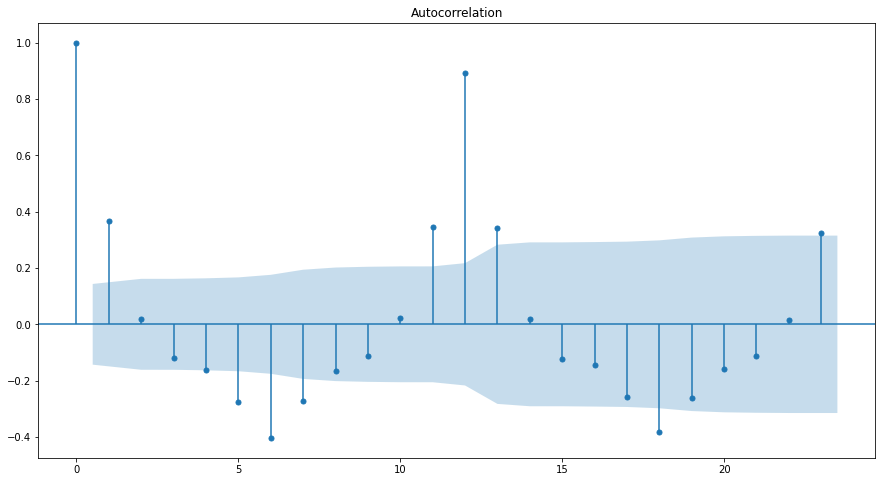

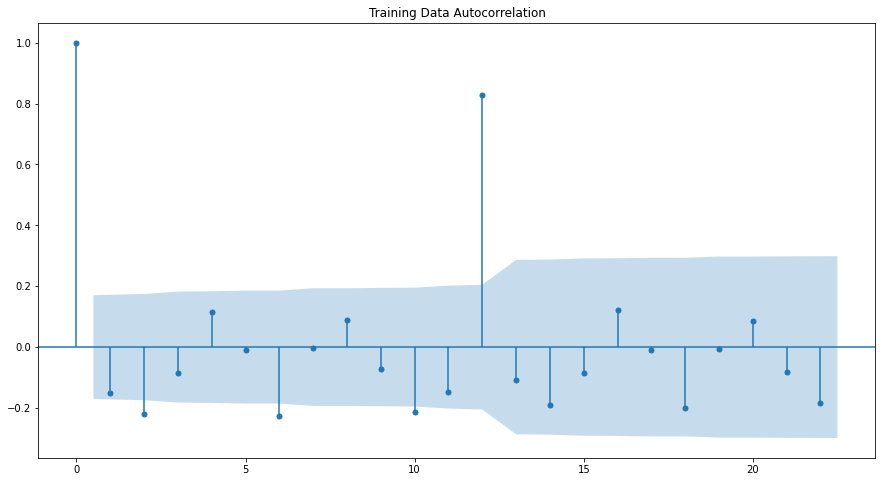

In [147]:
plt.figure(figsize=(12,5))
plot_acf(sparkling_wine,alpha=0.05);
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plt.show();

<Figure size 864x360 with 0 Axes>

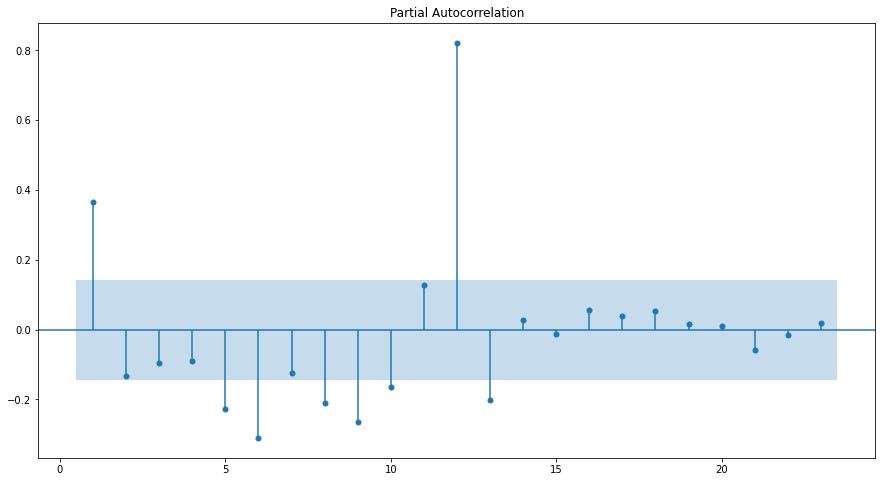

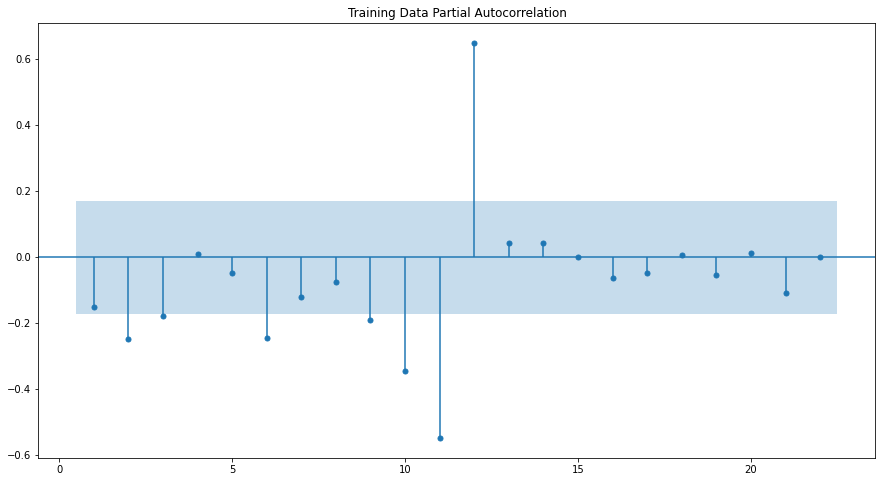

In [148]:
plt.figure(figsize=(12,5))
plot_pacf(sparkling_wine,zero=False,alpha=0.05,method='ywmle');
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show();

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

### ARIMA Model

In [149]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 19 Feb 2022   AIC                           2267.663
Time:                        00:15:05   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


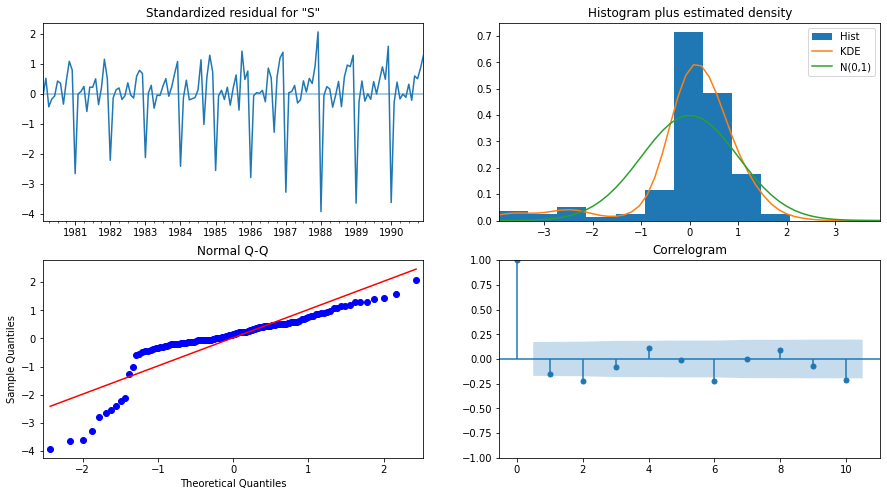

In [150]:
results_manual_ARIMA.plot_diagnostics();

### Model Evaluation

In [151]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [152]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

from sklearn.metrics import mean_squared_error

In [153]:
RMSE_manual_ARIMA = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
MAPE_manual_ARIMA = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE for the ARIMA model:',RMSE_manual_ARIMA,'\nMAPE for the ARIMA model:',MAPE_manual_ARIMA)

RMSE for the ARIMA model: 3864.2793518443914 
MAPE for the ARIMA model: 201.32764950352743


In [154]:
sparkling_wine_resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA],'Test MAPE': [MAPE_manual_ARIMA]},index=['ARIMA Manual(0,1,0)'])
sparkling_wine_resultsDf_manual_ARIMA

,Test RMSE,Test MAPE
"ARIMA Manual(0,1,0)",3864.279352,201.32765


In [155]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf_manual_ARIMA])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.150000
NaiveModel,3864.279352,152.870000
SimpleAverage,1275.073380,38.810000
2 point TMA,813.400684,19.700000
4 point TMA,1156.589694,35.960000
6 point TMA,1283.927428,43.860000
9 point TMA,1346.278315,46.860000
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.470000
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.230000
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.390000


### SARIMA Model

In [156]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [157]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [158]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640236032


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:3957.9994428067516
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389776
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791726
SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:3671.7408747152567
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158604901
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.989805392084


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:3243.027136317264
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:1469.187105262584
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:1471.059453006533


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:3541.1087537074227
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566435
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572999903


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:3610.144811114565
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881837643
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319380044
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509144560762


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:3269.851596257583
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954179886
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245084042036
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018823976103


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:3232.987234043373
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:1428.4607679617734
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:1428.8727986095316
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:1429.5891874960987


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:3233.7703531132
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.4410101686954
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.9128007200843
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.8789891587157


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:4217.1832452338385
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1790.032633229792
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1724.1675070998492
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.1605066500492


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:3888.5692736376436
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:1603.9654774525075
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:1600.5438800506558
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.1215653517577


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:3844.1916059337295
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:1428.5993408039385
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:1429.7448370688005
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:1430.6883841504925


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:3853.278057662263
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:2168.0925408442013
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1873.9770692823524
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.297366189367


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:2952.623899383668
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1792.0311871947977
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1710.6404080517045
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.741899915419


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:2619.3675072984597
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:1604.571580743189
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:1601.0674814809681
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.0486177992532


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:2658.288493371361
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:1429.6529454244196
SARIMA(0, 1, 3)x(3, 0, 1, 12)7 - AIC:1441.1435174635053
SARIMA(0, 1, 3)x(3, 0, 2, 12)7 - AIC:1431.1544761734367


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:2503.4192146027726
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1954.3938339903295
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:1721.2688476355167


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:3845.1306472597803
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1811.244027933163
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1788.5343594838607
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:1616.4894405927826


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:3485.775845677416
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:1621.6355080128908
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:1617.1356132627118
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:1616.541206750614


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:3458.695244738031
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:1440.513464035846
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:1442.171978043275
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:1443.7660405752893


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:3463.976215915629
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:2204.934049154564
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1907.3558974128198
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:1678.0981352622123


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:1110.8722274710274
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1775.1424470454335
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1739.7167468080816
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.3248863535698
SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:3350.9513314644655
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:1590.616160687877
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:1586.3142234382556
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:1571.8069969902128
SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:3298.8777663115065
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:1414.9112073935692
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:1415.9502479812677
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:1417.0149039536088


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:3305.444806107937
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:2188.463345050467
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1889.7708307499913
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.6291421743722


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:4461.084274848251
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1771.8259800617218
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1723.9871792378638
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:1555.5842469231918


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:4129.171393810139
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:1588.421693237526
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:1585.5152933817733
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:1555.9345637178726


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:4093.2457522926675
SARIMA(1, 1, 2)x(3, 0, 0, 12)7 - AIC:1413.8102394506673
SARIMA(1, 1, 2)x(3, 0, 1, 12)7 - AIC:1414.9147062031443
SARIMA(1, 1, 2)x(3, 0, 2, 12)7 - AIC:1415.966285893524


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12)7 - AIC:4096.624074359673
SARIMA(1, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.0264039775243
SARIMA(1, 1, 3)x(0, 0, 1, 12)7 - AIC:1869.9381452871066
SARIMA(1, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.521765010962


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:3584.6163927357647
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1772.3921731289906
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1711.9554893470433
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.5744740397374


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:3136.5246432105996
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:1590.417689849889
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:1587.366898728557
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.2449108515214


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:3133.2583638972355
SARIMA(1, 1, 3)x(3, 0, 0, 12)7 - AIC:1415.772333238723
SARIMA(1, 1, 3)x(3, 0, 1, 12)7 - AIC:1416.7527821233537
SARIMA(1, 1, 3)x(3, 0, 2, 12)7 - AIC:1417.764918338939


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:3137.7348338631887
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.4383435409704
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:1711.4123039811768


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:4301.437802601755
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1780.7646066060363
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1756.9357349136885
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.970220675955


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:3245.840601701798
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:1592.2403464844328
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:1587.6344987216228
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:1585.919173624426
SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:3639.0062591506558
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:1411.9449728030017
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:1413.1017618791059
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:1414.1975665030234


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:2633.6944350092353
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:2199.8586131455877
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1905.0209495983902
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:1675.4234080332499
SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:3962.360756644827
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1792.8234292918198
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1740.0911258976762
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.9888283226721


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:2681.8847665557537
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:1577.123506113906
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:1573.1595849546422
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:1572.3428655237344


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:2822.721176405939
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:1402.4673345930216
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:1403.1307580347927
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:1403.8241332352886


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:3283.1744198123433
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:2176.8681147720986
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1892.2372630573605
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:1661.5523434304894


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:3779.296402437938
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140949478994
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.6086050655329
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.3404020907662


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:3429.502400367608
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1625.2275547348581
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.5476020966373
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.6784830116035


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:3412.678464922116
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:1404.4723158904374
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:1402.504030896893
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:1403.4358931581116


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:3432.6425422097423
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.039588848266
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1865.0411689494942
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.707279225746
SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:3893.158544834119
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1759.0457579473964
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1707.403347016838
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.5288611970232


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:3532.8170491966252
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:1577.6922229473087
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:1569.6190233793886
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.9977238827332
SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:3529.3783998181098
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:1399.7898692859192
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:1406.8786611172998
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:1401.2981506316305


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:3500.2536653045067
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.368629141874
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:1709.5089923147184
SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:4016.911024331373
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1762.7961104703277
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1740.378383414043
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.0471970295084
SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:3677.7408747316667
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:1578.2748025628096
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:1572.9330814125963
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:1571.6808197066384


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:3772.6049817379053
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:1396.867862048123
SARIMA(3, 1, 0)x(3, 0, 1, 12)7 - AIC:1397.677470893142
SARIMA(3, 1, 0)x(3, 0, 2, 12)7 - AIC:1398.3074657916825


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12)7 - AIC:3069.475179427819
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:2188.2220983419875
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1906.969069595
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:1677.4234050813945


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:3952.662177908351
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1746.2222521239976
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1742.3812300472148
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:1573.6844968407831


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:2801.3940008565023
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:1564.937750545543
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:1576.2959933029617
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:1576.349812045304


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:2825.5348996239495
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:1387.7883313112627
SARIMA(3, 1, 1)x(3, 0, 1, 12)7 - AIC:1388.6814848237075
SARIMA(3, 1, 1)x(3, 0, 2, 12)7 - AIC:1389.1958975996995


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:3915.377594385088
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.314727159592
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.7804524425233
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.62550297186


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:3010.275216857585
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1744.9635868965647
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1727.365037900299
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:1559.3357685742521


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:3580.656271955258
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:1566.9453766215497
SARIMA(3, 1, 2)x(2, 0, 1, 12)7 - AIC:1568.9929010103097
SARIMA(3, 1, 2)x(2, 0, 2, 12)7 - AIC:1559.8091520405064


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12)7 - AIC:1653.4449382400378
SARIMA(3, 1, 2)x(3, 0, 0, 12)7 - AIC:1398.7832381875992
SARIMA(3, 1, 2)x(3, 0, 1, 12)7 - AIC:1388.6021935931758
SARIMA(3, 1, 2)x(3, 0, 2, 12)7 - AIC:1389.7019925618886


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:3140.785182990956
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:2155.774954204623
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1874.7818291386257
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.7830003490528
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:7368.533236946533
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1741.382342972622
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1709.843040055015
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:1544.3935752086657


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:3349.009112746197
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:1565.9762844507172
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:1557.873445857568
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:1547.2840296174259


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:3502.8877812863357
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:1389.1420849439614
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:1393.6830700861547
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:1391.6927500916192


C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:2604.243336759511


In [159]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
83,"(1, 1, 1)","(0, 0, 3, 12)",1110.872227
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602194
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681485
252,"(3, 1, 3)","(3, 0, 0, 12)",1389.142085


Lowest AIC is 1110.872 with params (1,1,1) and seasonal (0,0,3,12)

In [160]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_ses_diff = mod.fit()
print(results_SARIMA_ses_diff.summary())

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -549.436
Date:                                    Sat, 19 Feb 2022   AIC                           1110.872
Time:                                            00:31:29   BIC                           1126.068
Sample:                                        01-31-1980   HQIC                          1117.008
                                             - 12-31-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7195      0.004    201.887      0

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


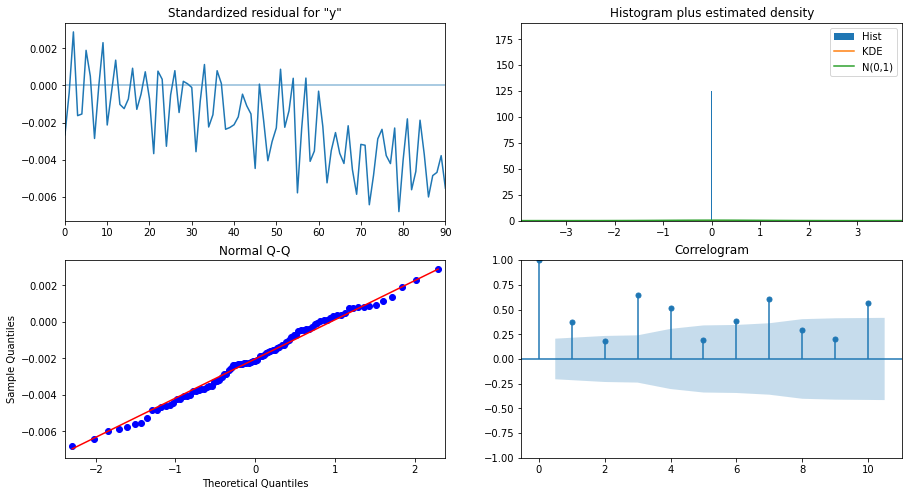

In [161]:
results_SARIMA.plot_diagnostics();

### Model Evaluation

In [162]:
predicted_manual_SARIMA = results_SARIMA.forecast(steps=len(test))

In [163]:
RMSE_manual_SARIMA = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA,squared=False)
MAPE_manual_SARIMA = MAPE(test['Sparkling'],predicted_manual_SARIMA)

print('RMSE for the SARIMA model:',RMSE_SARIMA,'\nMAPE for the SARIMA model:',MAPE_SARIMA)

RMSE for the SARIMA model: 526.2589525120587 
MAPE for the SARIMA model: 18.79


In [164]:
sparkling_wine_resultsDf_manual_SARIMA = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA],'Test MAPE': [MAPE_manual_SARIMA]},index=['SARIMAX(1, 1, 1)x(0, 0, 3, 12)'])
sparkling_wine_resultsDf_manual_SARIMA

,Test RMSE,Test MAPE
"SARIMAX(1, 1, 1)x(0, 0, 3, 12)",14459.104175,558.26


In [165]:
spark_resultsDf = pd.concat([spark_resultsDf, sparkling_wine_resultsDf_manual_SARIMA])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.150000
NaiveModel,3864.279352,152.870000
SimpleAverage,1275.073380,38.810000
2 point TMA,813.400684,19.700000
4 point TMA,1156.589694,35.960000
6 point TMA,1283.927428,43.860000
9 point TMA,1346.278315,46.860000
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.470000
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,68.230000
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.390000


In [166]:
spark_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",469.659106,16.390000
"SARIMAX(1, 1, 2)x(1, 0, 2, 12)",526.258953,18.790000
2 point TMA,813.400684,19.700000
4 point TMA,1156.589694,35.960000
SimpleAverage,1275.073380,38.810000
6 point TMA,1283.927428,43.860000
"ARIMA(2, 1, 2)",1299.980353,47.100122
Alpha=0.995:SimpleExponentialSmoothing,1316.135411,45.470000
9 point TMA,1346.278315,46.860000
RegressionOnTime,1389.135175,50.150000


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Optimum Model

Text(0.5, 1.0, 'Sale of Sparkling Wine: Forecast Vs Actual Test set')

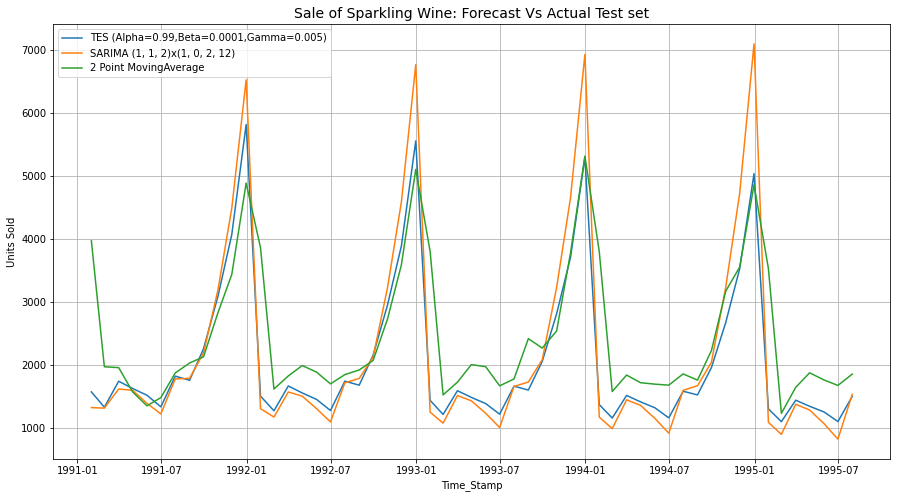

In [167]:
# Top 3 Models
plt.plot(test_predictions_TES, label='TES (Alpha=0.99,Beta=0.0001,Gamma=0.005)')
plt.plot(predicted_auto_SARIMA, label='SARIMA (1, 1, 2)x(1, 0, 2, 12)')
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'],  label='2 Point MovingAverage')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time_Stamp')
plt.ylabel('Units Sold')
plt.title('Sale of Sparkling Wine: Forecast Vs Actual Test set', fontsize=14)

### Triple Exponential Smoothing Model

In [168]:
model_sparkling_wine_TES = ExponentialSmoothing(sparkling_wine['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_sparkling_wine_TES_fit = model_sparkling_wine_TES.fit(optimized=True,use_brute=True)

In [169]:
model_sparkling_wine_TES_fit.params

{'smoothing_level': 0.07571486110131649,
 'smoothing_trend': 0.07571482242314051,
 'smoothing_seasonal': 0.2738624214700055,
 'damping_trend': nan,
 'initial_level': 1579.9999443612564,
 'initial_trend': -15.114680152935364,
 'initial_seasons': array([1.07029346, 1.00937498, 1.47021754, 1.216548  , 0.98905917,
        0.96247357, 1.31786993, 1.71672369, 1.40270005, 1.91040262,
        2.93453289, 3.81409735]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [170]:
TES_sparkling_wine_forecast = model_sparkling_wine_TES_fit.forecast(steps=12)

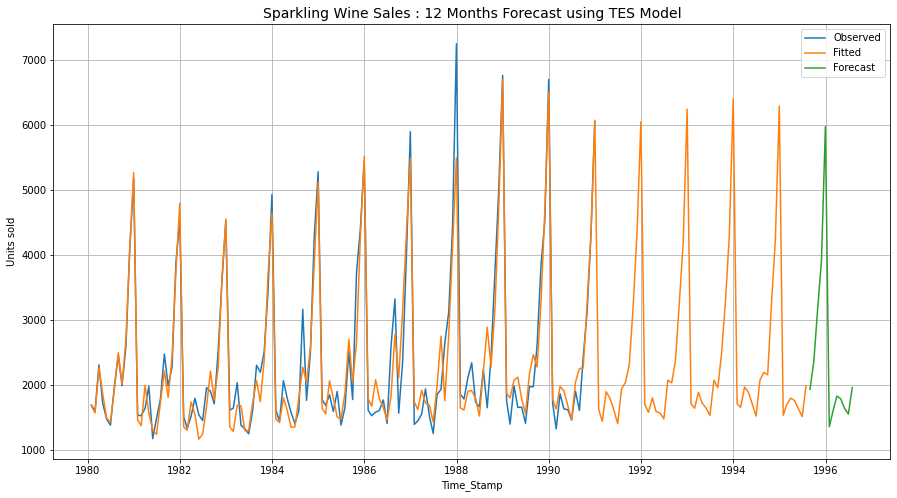

In [171]:
plt.plot(TES_train['Sparkling'], label='Observed')
plt.plot(model_sparkling_wine_TES_fit.fittedvalues, label='Fitted')
plt.plot(TES_sparkling_wine_forecast, label='Forecast')

plt.legend(loc='upper left')
plt.legend(loc='best')
plt.xlabel('Time_Stamp')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sparkling Wine Sales : 12 Months Forecast using TES Model', fontsize = 14);

### Model Evaluation

In [172]:
from sklearn import metrics

In [173]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [174]:
rmse_sparkling_wine_model_test = metrics.mean_squared_error(sparkling_wine['Sparkling'],model_sparkling_wine_TES_fit.fittedvalues,squared=False)
mape_sparkling_wine_model_test = MAPE(sparkling_wine['Sparkling'],model_sparkling_wine_TES_fit.fittedvalues)
print("For Triple Exponential Smoothing forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_model_test, mape_sparkling_wine_model_test))

For Triple Exponential Smoothing forecast on the Testing Data,  RMSE is 346.179 and MAPE is 10.20


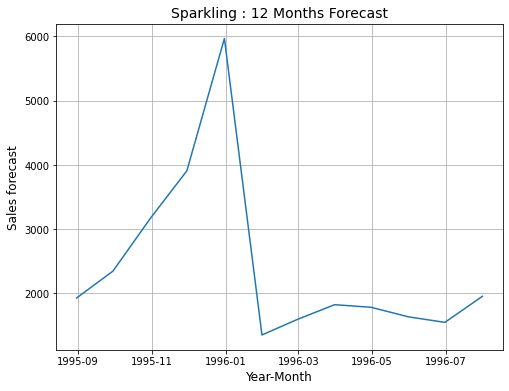

In [175]:
plt.figure(figsize=(8,6))
plt.plot(TES_sparkling_wine_forecast, label='Forecast')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.grid()
plt.title('Sparkling : 12 Months Forecast', fontsize=14);

### SARIMA Model

In [176]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling_wine['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\couti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sat, 19 Feb 2022   AIC                           2360.826
Time:                                    00:31:38   BIC                           2382.308
Sample:                                01-31-1980   HQIC                          2369.549
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.1802      0.219   

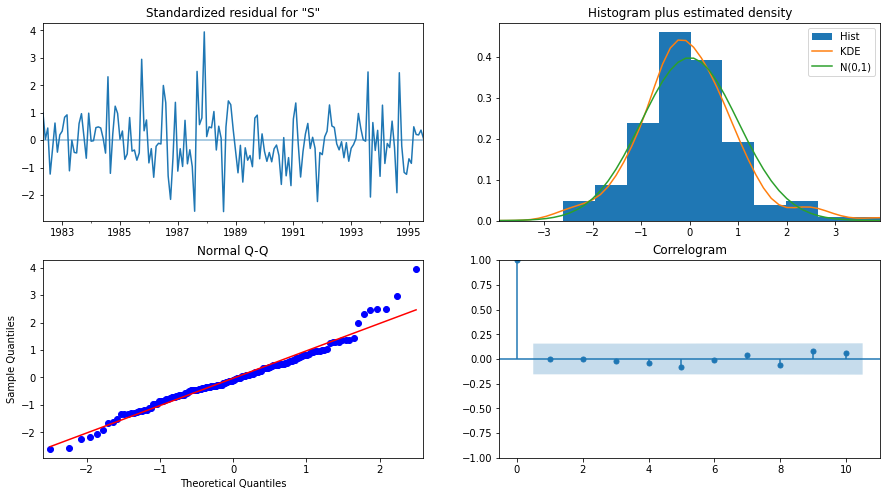

In [177]:
results_full_data_model.plot_diagnostics();

In [178]:
predicted_sparkling_wine_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [179]:
predicted_sparkling_wine_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1836.377165,379.707825,1092.163504,2580.590825
1995-09-30,2489.583686,384.471211,1736.033959,3243.133414
1995-10-31,3324.585861,384.577017,2570.828758,4078.342963
1995-11-30,4020.145869,386.334861,3262.943456,4777.348283
1995-12-31,6289.937355,386.389399,5532.628049,7047.246661


In [180]:
pred_full_SARIMA_date = predicted_sparkling_wine_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

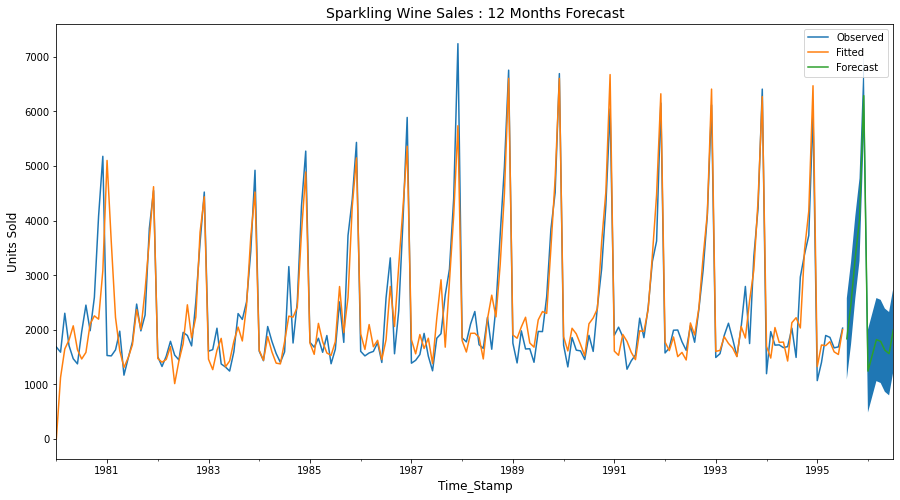

In [181]:
axis = sparkling_wine['Sparkling'].plot(label='Observed')
results_full_data_model.fittedvalues.plot(ax=axis, label='Fitted')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast')
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'])
plt.xlabel('Time_Stamp',fontsize=12)
plt.ylabel('Units Sold',fontsize=12)
plt.title('Sparkling Wine Sales : 12 Months Forecast', fontsize=14)

plt.legend(loc='best')
plt.show()

### Model Evaluation

In [182]:
rmse_sparkling_wine_sarima_full = metrics.mean_squared_error(sparkling_wine['Sparkling'],results_full_data_model.fittedvalues,squared=False)
mape_sparkling_wine_sarima_full = MAPE(sparkling_wine['Sparkling'],results_full_data_model.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_sparkling_wine_sarima_full, mape_sparkling_wine_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 539.921 and MAPE is 14.10


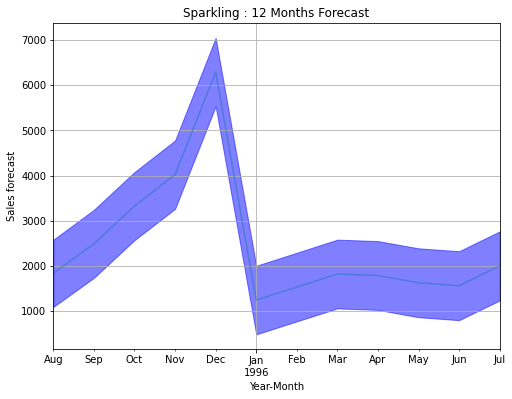

In [183]:
plt.figure(figsize=(8,6))
axis = pred_full_SARIMA_date['mean'].plot( alpha=0.5)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='blue', alpha=0.5)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.grid()
plt.title('Sparkling : 12 Months Forecast', fontsize=12);

In [184]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_SARIMA_date['mean'],2)})
forecast

,Sparkling
1995-08-31,1836.38
1995-09-30,2489.58
1995-10-31,3324.59
1995-11-30,4020.15
1995-12-31,6289.94
1996-01-31,1244.62
1996-02-29,1533.17
1996-03-31,1821.69
1996-04-30,1788.51
1996-05-31,1627.58
